In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df = pd.read_excel('cleaned_dataset.xlsx')
df.head()

,Carimbo de data/hora,id_integer,role,years_exp,org_size,org_field,agile_methods,use_metrics_planning,use_metrics_review,use_metrics_weekly,...,metric_9,metric_10,metric_11,metric_12,metric_13,metric_14,metric_15,metric_16,metric_17,metric_18
0,17:34:49,1,Product manager,0 a 5,Microempresa,energia,"Scrum, Kanban",Métricas,NaN,Métricas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17:57:23,2,Desenvolvedor(a),0 a 5,Microempresa,Financeiro,"Scrum, Kanban",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20:50:58,3,Product manager,0 a 5,Pequena empresa,Eventos,Scrum,NaN,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22:26:06,4,Team leader,6 a 9,Microempresa,gestão,"Scrum, Kanban",Métricas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19:07:11,5,Product manager,0 a 5,Pequena empresa,Agronegocio,"Scrum, Kanban",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Converter a string em uma lista de métricas
metrics = df['sanitized_metrics'].str.split(', ', expand=True)

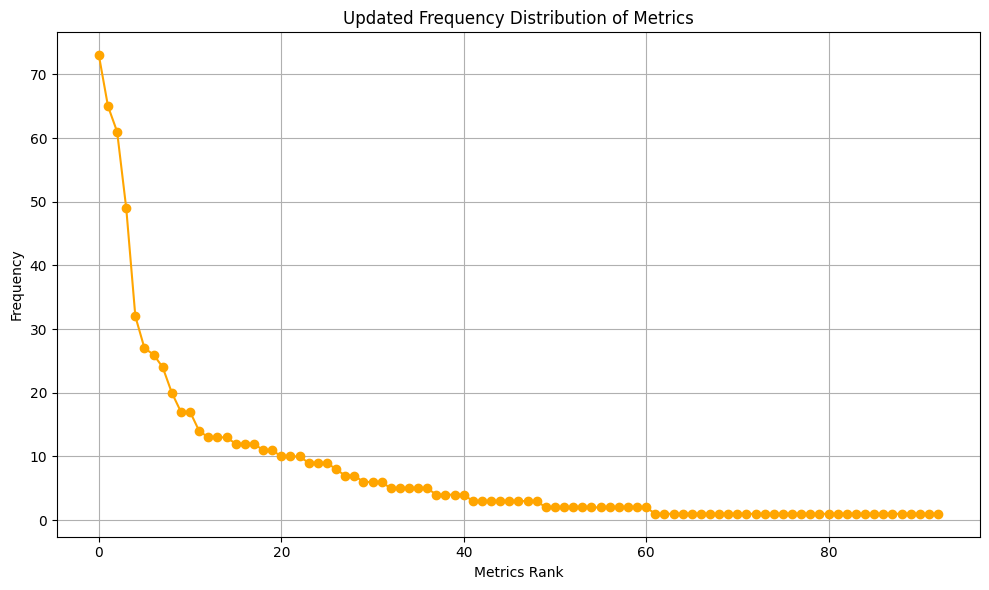

In [49]:
# Contar a frequência de cada métrica
metric_counts = metrics.stack().value_counts()

# Plotar o gráfico de frequência das métricas
plt.figure(figsize=(10, 6))
plt.plot(metric_counts.sort_values(ascending=False).values, marker='o', color='orange')
plt.xlabel('Metrics Rank')
plt.ylabel('Frequency')
plt.title('Updated Frequency Distribution of Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# --------------------- Remoção por Frequencia ---------------------

# Definindo o limite de frequencia para identificar outliers
low_frequency_threshold = 4  

# Identificar métricas que são consideradas outliers com base na baixa frequencia
low_frequency_outliers = metric_counts[metric_counts <= low_frequency_threshold].index

low_frequency_outliers

Index(['Apdex', 'Turnover', 'Contact Rate', 'Funil', 'Delivery on time',
       'Disponibilidade do produto', 'Tempo melhorias', 'WIP', 'Aquisição',
       'DORA Metrics', 'Quantidade de alertas', 'Bugs density',
       'Planned hours', 'Time to recover', 'Cultura Organizacional', 'EBTDA',
       'Evolução de Produto', 'Tempo médio de recuperação', 'Metricas de uso',
       'BPS', 'Indicator about risky user stories', 'RAID',
       'Number of deployments', 'Backlog',
       'Quantidade de solicitações de clientes', 'Commit Review Performance',
       'Change failure rate', 'Role Time Measure', 'Pulse', 'Burn-up',
       'BoardColumn', 'Evolução (Cognitiva-Científica',
       'Effort estimation accuracy', 'Running Tested Features Metric',
       'Hours spent on bugs', 'Leads', 'Queue impediments size', 'Faturamento',
       'Taxas de exceções', 'CES', 'Transações', 'EAC',
       'Rejected Product Backlog Items', 'Compliance', 'SRE', '9box',
       'Telas por sessão', 'Taxa de Retenção'

In [51]:
# Verifique se todos os valores na coluna 'sanitized_metrics' são strings
df['sanitized_metrics'] = df['sanitized_metrics'].astype(str)

# Remover métricas outliers de sanitized_metrics
df['sanitized_metrics'] = df['sanitized_metrics'].apply(
    lambda x: ', '.join([metric for metric in x.split(', ') if metric not in low_frequency_outliers])
)

# Verificar os valores atualizados
df['sanitized_metrics'].head()

0                                  Ideal team capacity
1    NPS, Burndown, Outstanding bugs, Throughput, N...
2                              Burndown, OKR, Velocity
3                 CAC, Throughput, Roadmaps, Conversão
4                               User Story Points, NPS
Name: sanitized_metrics, dtype: object

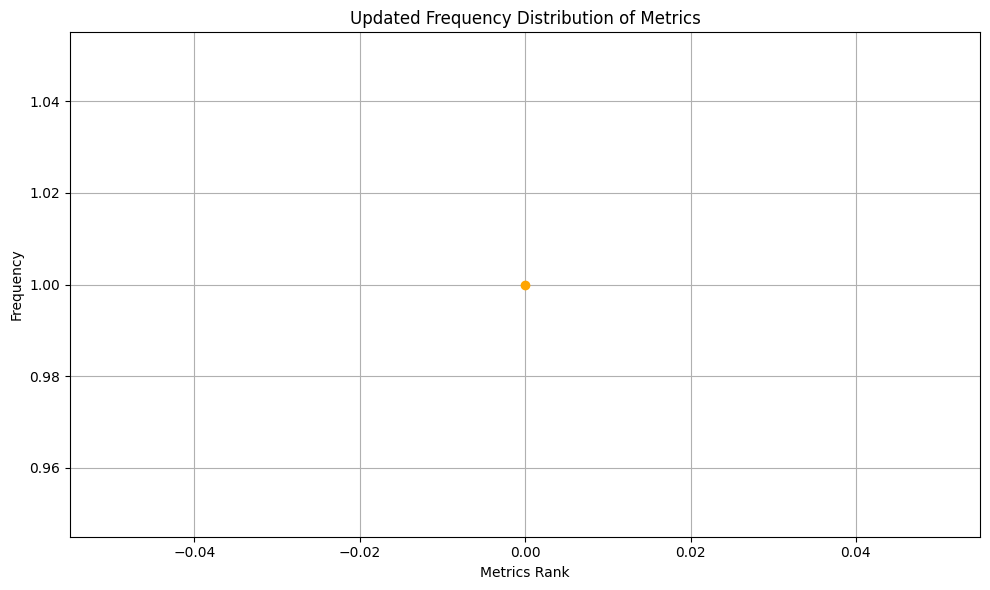

In [52]:
# Recalcular as frequências das métricas no DataFrame limpo
updated_metrics = df['sanitized_metrics'].str.split(', ', expand=True)
updated_metric_counts = updated_metrics.value_counts()

plt.figure(figsize=(10, 6))
plt.plot(updated_metric_counts.sort_values(ascending=False).values, marker='o', color='orange')
plt.xlabel('Metrics Rank')
plt.ylabel('Frequency')
plt.title('Updated Frequency Distribution of Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
df.to_excel('updated_dataset.xlsx', index=False)

In [54]:
df.head()

,Carimbo de data/hora,id_integer,role,years_exp,org_size,org_field,agile_methods,use_metrics_planning,use_metrics_review,use_metrics_weekly,...,metric_9,metric_10,metric_11,metric_12,metric_13,metric_14,metric_15,metric_16,metric_17,metric_18
0,17:34:49,1,Product manager,0 a 5,Microempresa,energia,"Scrum, Kanban",Métricas,NaN,Métricas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17:57:23,2,Desenvolvedor(a),0 a 5,Microempresa,Financeiro,"Scrum, Kanban",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20:50:58,3,Product manager,0 a 5,Pequena empresa,Eventos,Scrum,NaN,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22:26:06,4,Team leader,6 a 9,Microempresa,gestão,"Scrum, Kanban",Métricas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19:07:11,5,Product manager,0 a 5,Pequena empresa,Agronegocio,"Scrum, Kanban",Métricas,Métricas,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
